In [2]:
from PPO_train_test import PPO_train, PPO_train_udr, PPO_train_adr, PPO_test

# Hopper Environment

We want to deploy our agent in the real world that is represented by the Target environment, but we have only access to a simulator (source environment) which has a sistematic error wrt real word.

Since we want to close this sim2real gap we will experiment some techniques to address this problem.

To begin with, we will try a simple UDR. Then our focus will be implementing an ADR technique inspired to the OpenAI original paper where ADR is formally introduced in the RL world.

In the following experiment a PPO, policy-based RL algorithm, will be employed.

In [3]:
TIMESTEPS = 800_000

To begin with, lets train PPO on source and test on source:

In [ ]:
PPO_train(
    train_env_id='CustomHopper-source-v0',
    model_name='ppo_source',
    lr=3e-4,
    steps=TIMESTEPS
)

In [ ]:
src_mean, src_std = PPO_test(
    test_env_id='CustomHopper-source-v0',
    model_name='ppo_source'
)

Now, lets test it on target:

In [ ]:
src_mean, src_std = PPO_test(
    test_env_id='CustomHopper-target-v0',
    model_name='ppo_source'
)

Now we train PPO on target and test it on target

In [ ]:
PPO_train(
    train_env_id='CustomHopper-target-v0',
    model_name='ppo_target',
    lr=3e-4,
    steps=TIMESTEPS
)

In [5]:
src_mean, src_std = PPO_test(
    test_env_id='CustomHopper-target-v0',
    model_name='ppo_target'
)

--- Testing on CustomHopper-target-v0 ---
Test mean cumulative reward 1681.5172216808796 +/- 96.97973882807239


## UDR

Lets use UDR:


--- Training on CustomHopper-source-v0 using UDR ---


Output()

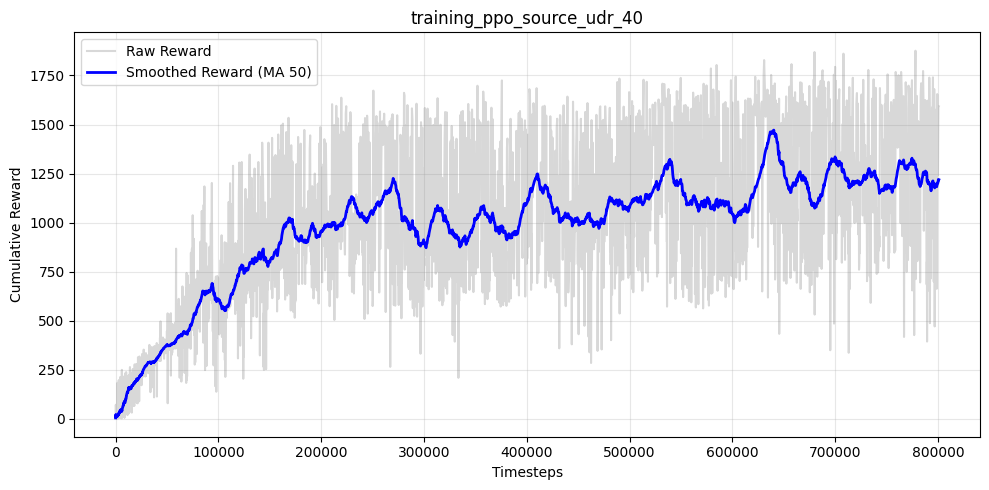

In [4]:
PPO_train_udr(
    train_env_id='CustomHopper-source-v0',
    model_name='ppo_source_udr_40',
    lr=3e-4,
    lr_scheduler_type='constant',
    steps=TIMESTEPS,
    udr_range=0.4
)

In [5]:
src_mean, src_std = PPO_test(
    test_env_id='CustomHopper-target-v0',
    model_name='ppo_source_udr_40'
)

--- Testing on CustomHopper-target-v0 ---


/opt/miniconda3/envs/rl_project/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Test mean cumulative reward 895.0169688081742 +/- 12.729625591307142


## ADR

Now, lets get serious and use Automatic Domain Randomization (OpenAI style, that is testing the borders before enlarging the distribution range):


--- Training on CustomHopper-source-v0 using ADR ---


Output()

/opt/miniconda3/envs/rl_project/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:70: 
UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting 
modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first
with ``Monitor`` wrapper.
  warnings.warn(

[ADR Boundary Test] Range +/- 5.0% -> Reward: 798.94 +/- 170.97995702611286

[ADR Boundary Test] Range +/- 5.0% -> Reward: 879.79 +/- 482.2012989310337

[ADR Boundary Test] Range +/- 5.0% -> Reward: 1547.39 +/- 55.29069504437533

[ADR Boundary Increased] New Range +/- 10.0%

[ADR Boundary Test] Range +/- 10.0% -> Reward: 1591.10 +/- 19.61425550542153

[ADR Boundary Increased] New Range +/- 15.0%

[ADR Boundary Test] Range +/- 15.0% -> Reward: 1684.58 +/- 42.21437562506007

[ADR Boundary Increased] New Range +/- 20.0%

[ADR Boundary Test] Range +/- 20.0% -> Reward: 1673.71 +/- 113.90069279916571

[ADR Boundary Increased] New Range +/- 25.0%

[ADR Boundary Test] Range +/- 25.0% -> Reward: 1502.73 +/- 175.38870656374283

[ADR Boundary Increased] New Range +/- 30.0%

[ADR Boundary Test] Range +/- 30.0% -> Reward: 1284.30 +/- 226.79626808455149

[ADR Boundary Increased] New Range +/- 35.0%

[ADR Boundary Test] Range +/- 35.0% -> Reward: 1180.03 +/- 314.6971377525056

[ADR Boundary Test] Range +/- 35.0% -> Reward: 1486.61 +/- 333.0984407992232

[ADR Boundary Increased] New Range +/- 40.0%

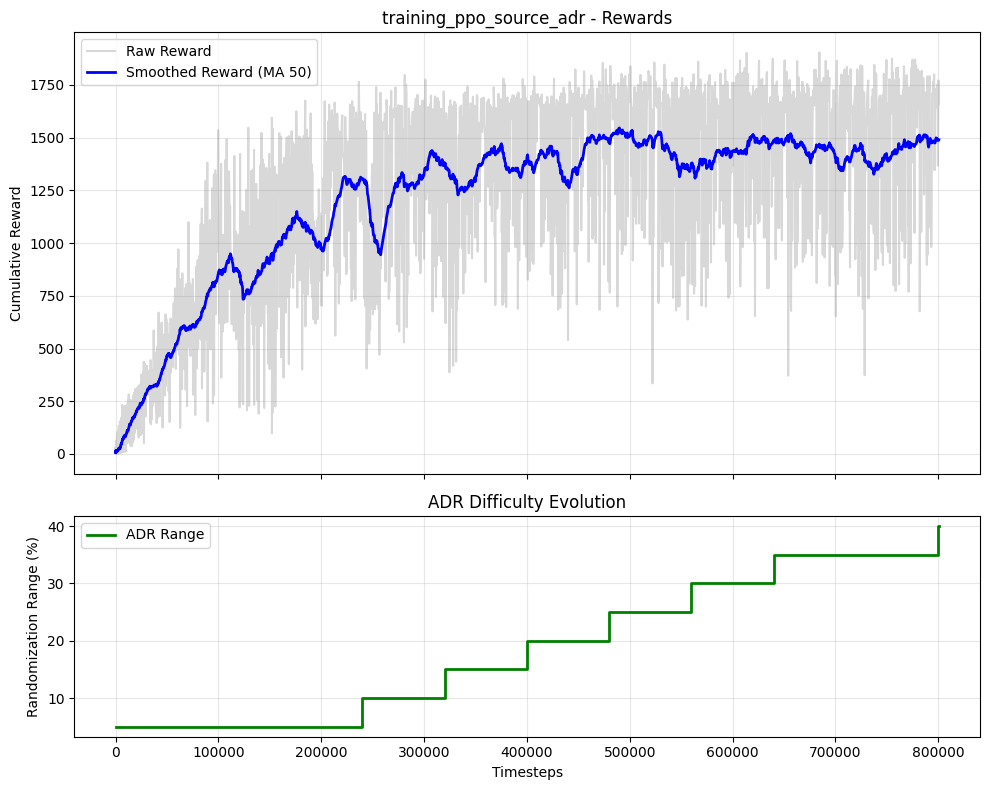

In [3]:
PPO_train_adr(
    train_env_id='CustomHopper-source-v0',
    model_name='ppo_source_adr',
    lr=3e-4,
    lr_scheduler_type="linear",
    steps=TIMESTEPS,
    starting_adr_range=0.05,
    objective_adr_range=0.4
)

In [6]:
adr_mean, adr_std = PPO_test(
    test_env_id='CustomHopper-target-v0',
    model_name='ppo_source_adr'
)

--- Testing on CustomHopper-target-v0 ---
Test mean cumulative reward 1765.4548904204369 +/- 93.65272328663086


## Visualization

In [ ]:
from utils.visualize_agent import visualize

model = "ppo_source_adr"

visualize(
    model_path=f"models/{model}",
    env_id="CustomHopper-target-v0"
)

Caricamento modello da: models/ppo_source_adr
Visualizzazione su ambiente: CustomHopper-target-v0
--- Episodio 1 ---
Reward Totale: 1701.46
--- Episodio 2 ---
Reward Totale: 1831.88
--- Episodio 3 ---
Reward Totale: 1776.60
--- Episodio 4 ---
Reward Totale: 1598.32
--- Episodio 5 ---
Reward Totale: 1878.64
